# Step 7 : Data Mining

## PD Model Estimation

### Logistic Regression

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
reg = LogisticRegression()

In [28]:
pd.options.display.max_rows = 100

In [34]:
# Import data
loan_data = pd.read_csv('loan_data_to_model.csv')

In [29]:
loan_data.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,verification_status:Source Verified,verification_status:Not Verified,...,mths_since_last_delinq:53-75,mths_since_last_delinq:>=76,mths_since_last_record:Missing,mths_since_last_record:21-30,mths_since_last_record:31-46,mths_since_last_record:47-61,mths_since_last_record:62-67,mths_since_last_record:68-79,mths_since_last_record:>=80,good_bad
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [35]:
# Splitting data
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), 
                                                                                                                  loan_data['good_bad'], 
                                                                                                                  test_size = 0.2, 
                                                                                                                  random_state = 22)

In [36]:
loan_data_inputs_train.shape

(709903, 113)

In [37]:
loan_data_inputs_test.shape

(177476, 113)

In [38]:
loan_data_targets_train.shape

(709903,)

In [39]:
loan_data_targets_test.shape

(177476,)

In [11]:
reg.fit(loan_data_inputs_train, loan_data_targets_train)

E:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
reg.intercept_

array([-1.26266428])

In [13]:
reg.coef_

array([[ 8.05813754e-01,  7.97576757e-01,  7.21712020e-01,
         6.04166785e-01,  4.49205301e-01,  2.23370966e-01,
         8.25443935e-02,  1.24688986e-01,  6.75650641e-03,
         1.06848786e-01,  2.04938741e-01,  1.80627111e-01,
         2.24831861e-01,  2.92113405e-01,  6.66556260e-02,
         1.39954387e-01,  1.51930310e-01,  1.36393675e-01,
         1.37725217e-01,  1.95339574e-01,  2.00154922e-01,
         1.91185462e-01,  2.54519476e-01,  2.72604811e-01,
         2.04350738e-01,  2.74393573e-01,  3.61500846e-01,
         3.90195084e-01,  5.22842641e-01,  4.15129267e-01,
         6.09354224e-02,  1.66378726e-03,  1.04504994e-01,
         1.26890618e-01,  1.23336676e-01,  1.06265736e-01,
         5.94230909e-02,  1.31394023e-01,  7.35702723e-02,
         1.43272994e-01,  4.00646990e+00,  2.79465678e+00,
         2.05920792e+00,  1.44946009e+00,  9.77049266e-01,
         7.14845881e-01,  5.54977073e-01,  4.39132956e-01,
         2.51472373e-01,  1.52004960e-02,  2.18095228e+0

In [14]:
feature_name = loan_data_inputs_train.columns.values

In [15]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.262664
1,grade:A,0.805814
2,grade:B,0.797577
3,grade:C,0.721712
4,grade:D,0.604167
5,grade:E,0.449205
6,grade:F,0.223371
7,home_ownership:OWN,0.082544
8,home_ownership:MORTGAGE,0.124689
9,verification_status:Source Verified,0.006757


### Build a Logistic Regression Model with P-Values

We'll need a way to assess which independent variables contribute to predicting borrower default and which don't. In the final model, we will keep only the relevant ones.

In [16]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)
        
    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        eps=1e-4
        F_ij = np.dot((X / denom).T,X) + np.eye(F_ij.shape[0])*eps ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [17]:
reg = LogisticRegression_with_p_values()

In [18]:
reg.fit(loan_data_inputs_train, loan_data_targets_train)

E:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [19]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.262664
1,grade:A,0.805814
2,grade:B,0.797577
3,grade:C,0.721712
4,grade:D,0.604167
5,grade:E,0.449205
6,grade:F,0.223371
7,home_ownership:OWN,0.082544
8,home_ownership:MORTGAGE,0.124689
9,verification_status:Source Verified,0.006757


In [20]:
p_values = reg.p_values

In [21]:
p_values = np.append(np.nan, np.array(p_values))

In [22]:
summary_table['p_values'] = p_values

In [23]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.262664,NaN
1,grade:A,0.805814,6.554684e-24
2,grade:B,0.797577,6.268791e-38
3,grade:C,0.721712,6.117026e-41
4,grade:D,0.604167,9.895925e-37
5,grade:E,0.449205,7.371506e-28
6,grade:F,0.223371,1.338251e-07
7,home_ownership:OWN,0.082544,3.968441e-06
8,home_ownership:MORTGAGE,0.124689,1.499965e-27
9,verification_status:Source Verified,0.006757,5.727115e-01


In [32]:
summary_table.to_csv('PD Model 1.csv')

## PD Model Validation (Test)

### Out-of-sample vallidation (test)

In [43]:
y_hat_test = reg.model.predict(loan_data_inputs_test)

In [44]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [45]:
y_hat_test_proba = reg.model.predict_proba(loan_data_inputs_test)

In [46]:
y_hat_test_proba

array([[0.0410244 , 0.9589756 ],
       [0.01289177, 0.98710823],
       [0.13310258, 0.86689742],
       ...,
       [0.20234902, 0.79765098],
       [0.196795  , 0.803205  ],
       [0.00239923, 0.99760077]])

In [47]:
y_hat_test_proba[: ][: , 1]

array([0.9589756 , 0.98710823, 0.86689742, ..., 0.79765098, 0.803205  ,
       0.99760077])

In [48]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]

In [49]:
loan_data_targets_test_temp = loan_data_targets_test

In [50]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [51]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)

In [52]:
df_actual_predicted_probs.shape

(177476, 2)

In [53]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [54]:
df_actual_predicted_probs.index = loan_data_inputs_test.index

In [55]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
781523,1,0.958976
618943,1,0.987108
85054,0,0.866897
590281,1,0.999662
483542,1,0.995448


### Accuracy and Area under the Curve

In [64]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

Confusion matrix

In [65]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7825,4453
1,38128,127070


In [66]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.044090,0.025091
1,0.214835,0.715984


In [67]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.7600746016362776

ROIC Curve

In [68]:
from sklearn.metrics import roc_curve, roc_auc_score

Output 3 arrays:
- False Positive Rate
- True Positive Rate
- Thresholds

In [69]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99991855, 1.        ,
        1.        ]),
 array([0.00000000e+00, 6.05334205e-06, 2.53029698e-03, ...,
        9.99975787e-01, 9.99975787e-01, 1.00000000e+00]),
 array([1.99982141, 0.99982141, 0.99961652, ..., 0.4306104 , 0.4285726 ,
        0.39952294]))

In [70]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

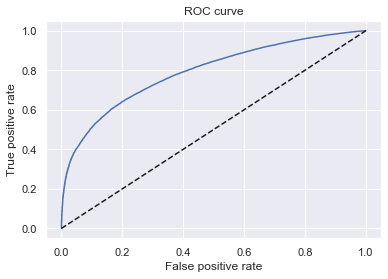

In [72]:
plt.plot(fpr, tpr) #ROC curve
plt.plot(fpr, fpr, linestyle = '--', color = 'k') #Benchmark(predicting by chance)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

Does it show that our model is good? What do we compare it to. We need some benchmark. Usually we compare it to predicting by chance. The area under the ROC curve is called AUC(area under the curve).

In [73]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.7908974381516909